# Алгоритм K-средних

In [2]:
from sklearn.cluster import KMeans
X = [[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]]
model = KMeans(n_clusters = 2, random_state = 0, n_init = "auto").fit(X)
model.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [3]:
model.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

## Описание работы алгоритма

   1. Случайным образом создаются k точек, в дальнейшем будем называть их центрами кластеров;

   2. Для каждой точки ставится в соответствии ближайший к ней центр кластера;

   3. Вычисляются средние арифметические точек, принадлежащих к определённому кластеру. Именно эти значения становятся новыми центрами кластеров;

   4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет приносить плоды. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

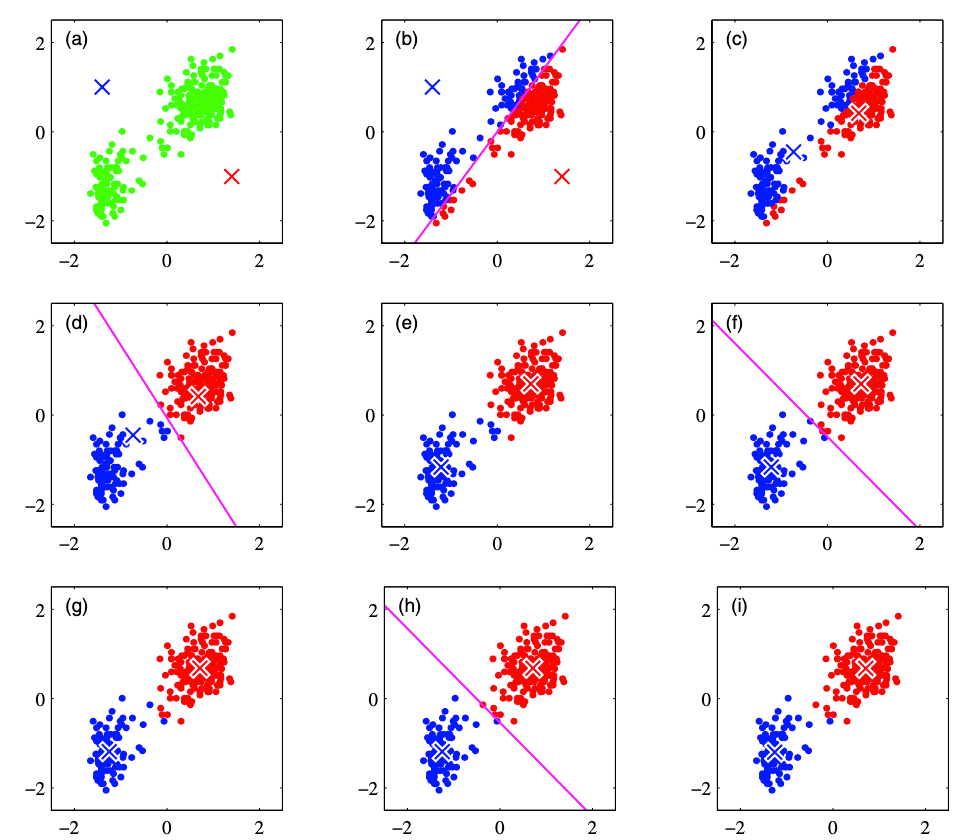

In [4]:
from sklearn.datasets import fetch_california_housing as giveData
data = giveData()

import pandas as pd
import numpy as np

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df


data = sklearn_to_df(data)

In [5]:
model = KMeans(n_clusters = 2, random_state = 42)

In [6]:
model.fit(data)

/home/eduard/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [7]:
model.labels_
model.cluster_centers_

array([[ 3.86615614e+00,  2.97915299e+01,  5.45996843e+00,
         1.10006616e+00,  1.13004903e+03,  2.90071671e+00,
         3.56884433e+01, -1.19622730e+02,  2.07496066e+00],
       [ 3.90557521e+00,  1.97330795e+01,  5.18958193e+00,
         1.07045936e+00,  3.70941794e+03,  4.38444325e+00,
         3.51944289e+01, -1.19159767e+02,  2.01906075e+00]])

In [8]:
args(model)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

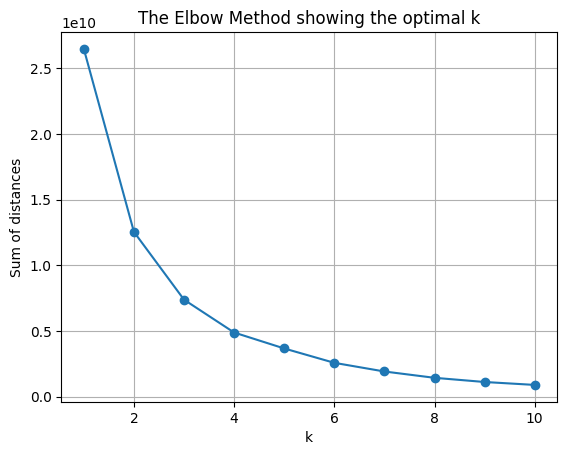

In [13]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def k_means(data):
    K = range(1,11)
    models = [KMeans(n_clusters = k, random_state = 42).fit(data) for k in K]
    dist = [model.inertia_ for model in models]

    plt.plot(K, dist, marker ='o')
    plt.xlabel('k')
    plt.ylabel('Sum of distances')
    plt.grid()
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    return models
models = k_means(data)

На графике выше ищем наиболее заметный излом. Это примерно будет правильное количество кластеров.

In [14]:
model = KMeans(n_clusters = 3, random_state = 42).fit(data)


In [15]:
model.cluster_centers_

array([[ 3.89652823e+00,  3.08127517e+01,  5.53773604e+00,
         1.10830438e+00,  9.43137651e+02,  2.85455143e+00,
         3.57652953e+01, -1.19683919e+02,  2.09244532e+00],
       [ 4.15307075e+00,  1.47826087e+01,  5.46589053e+00,
         1.07384122e+00,  6.13240711e+03,  7.37675093e+00,
         3.51687945e+01, -1.19051206e+02,  2.00788164e+00],
       [ 3.76976022e+00,  2.37923194e+01,  5.11588595e+00,
         1.06577687e+00,  2.34354050e+03,  3.26955868e+00,
         3.52967730e+01, -1.19294687e+02,  2.00642287e+00]])

In [16]:
data['cluster'] = model.labels_
data.groupby('cluster').mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
cluster,,,,,,,,,
0,3.896628,30.807594,5.538008,1.108290,943.419160,2.854685,35.765356,-119.683896,2.092304
1,4.153071,14.782609,5.465891,1.073841,6132.407115,7.376751,35.168794,-119.051206,2.007882
2,3.769331,23.798967,5.114628,1.065769,2344.345065,3.269655,35.296062,-119.294308,2.006727
